### 4.Using the "Online Retail" dataset, perform product analytics and time-series analysis as outlined below. Provide clear visualizations and interpret the results:

### Data Cleaning:
Filter the data to exclude negative or zero values for "Quantity" and "UnitPrice". Why is this step necessary?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('D:/PYTHON/DATA SCIENCE/DATA/Online Retail.xlsx')#sheetname='online retail

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [9]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
df=df.loc[df['Quantity']>0]

In [12]:
df=df.loc[df['UnitPrice']>0]

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


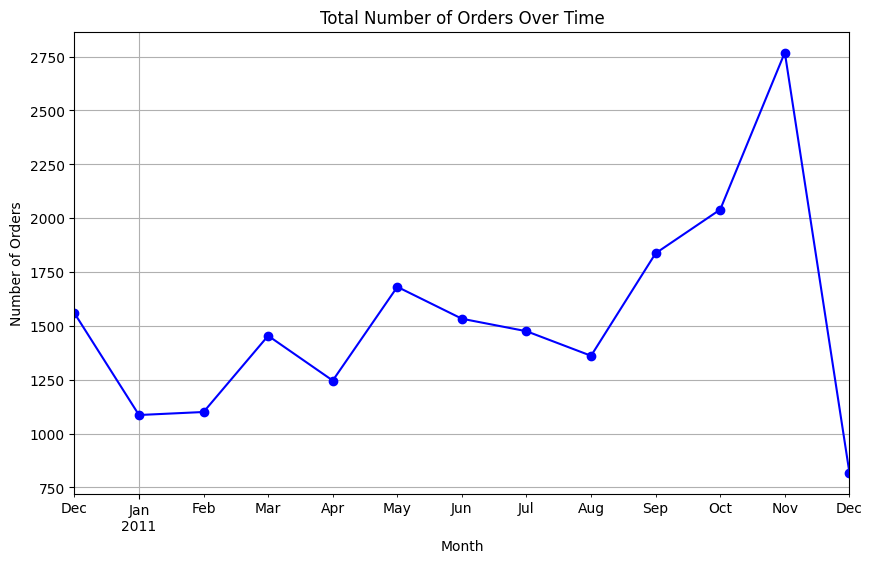

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Monthly number of orders
orders_by_month = df.groupby('Month')['InvoiceNo'].nunique()

# Plot the time series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
orders_by_month.plot(kind='line', marker='o', color='blue')
plt.title("Total Number of Orders Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


### Interpretation:
The line chart tracks monthly order trends, highlighting seasonal spikes or declines. It helps identify growth periods and potential downturns needing further analysis or marketing action.

### Revenue Analysis Over Time:
Create a time-series plot for total revenue over time. Describe how revenue is calculated and interpret the trends observed.
Why is ax.set_ylim used, and how does adjusting this parameter affect the plot?


In [15]:
df=df.loc[df['UnitPrice']>0]

In [16]:
df['sales']=df['Quantity']*df['UnitPrice']

In [17]:
monthly_revenue_df=df.set_index('InvoiceDate')['sales'].resample('M').sum()

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\1266411881.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df=df.set_index('InvoiceDate')['sales'].resample('M').sum()


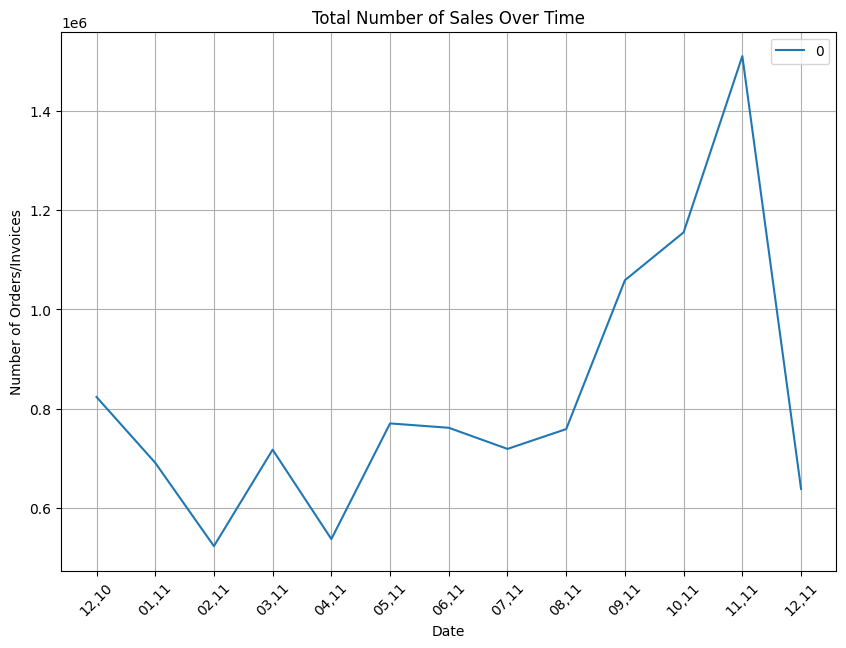

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'monthly_revenue_df' is already defined and indexed by date
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10, 7),
)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders/Invoices')
ax.set_title('Total Number of Sales Over Time')

# Formatting x-axis ticks for dates
plt.xticks(
    range(len(monthly_revenue_df.index)),
    [x.strftime('%m,%y') for x in monthly_revenue_df.index],
    rotation=45
)

plt.show()


### Interpretation:
Revenue is derived from **quantity × price** and summed over time. Adjusting `ax.set_ylim` scales the y-axis for clearer visualization of specific revenue ranges.

### Repeat vs. Unique Customers Analysis:
Analyze and plot the number of repeat and unique customers each month. How are repeat customers identified?
Explain the use of a dual-axis plot to show both the customer count and repeat customer percentage. Why is this type of visualization effective?


In [19]:
invoice_customerdf1 = df.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({
    'sales': 'sum',
    'CustomerID': 'first',
    'Country': 'first',
}).reset_index()


In [20]:
invoice_customerdf1=df.groupby(by=['InvoiceNo','InvoiceDate']).agg({
    'sales':sum,
    'CustomerID':max,
    'Country':max,
}).reset_index()

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\32310536.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  invoice_customerdf1=df.groupby(by=['InvoiceNo','InvoiceDate']).agg({
C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\32310536.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  invoice_customerdf1=df.groupby(by=['InvoiceNo','InvoiceDate']).agg({


In [21]:
invoice_customerdf1

,InvoiceNo,InvoiceDate,sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19997,581584,2011-12-09 12:25:00,140.64,13777.0,United Kingdom
19998,581585,2011-12-09 12:31:00,329.05,15804.0,United Kingdom
19999,581586,2011-12-09 12:49:00,339.20,13113.0,United Kingdom
20000,581587,2011-12-09 12:50:00,249.45,12680.0,France


In [22]:
df_customer= df[df['CustomerID']==13047.0]['sales'].sum()
df_customer

np.float64(3237.54)

In [23]:
monthly_repeat_customer_df=invoice_customerdf1.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x)>1) ['CustomerID'].resample('M').nunique()                                                                      

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\3821557082.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_repeat_customer_df=invoice_customerdf1.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x)>1) ['CustomerID'].resample('M').nunique()


In [24]:
monthly_repeat_customer_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
2011-12-31    106
Freq: ME, Name: CustomerID, dtype: int64

In [25]:
monthly_unique_customer_df=df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\672356104.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_customer_df=df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()


### percentage of Repeat customers

In [27]:
monthly_repeat_percentage=monthly_repeat_customer_df/monthly_unique_customer_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.052770
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.512019
2011-12-31    17.235772
Freq: ME, Name: CustomerID, dtype: float64

### Interpretation:
Repeat customers are identified by checking if a customer ID appears in multiple months. A dual-axis plot compares total customer count and repeat customer percentage over time, offering insights into customer loyalty trends and retention rates.

### Revenue from Repeat Customers:
Compute and plot monthly revenue from repeat customers. Why is it important to track this metric separately from overall revenue?
How would this information influence business strategies for customer retention?


In [31]:
monthly_revn_repeat_customer_df=invoice_customerdf1.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x)>1).resample('M').sum()['sales']

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\2092762820.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revn_repeat_customer_df=invoice_customerdf1.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x)>1).resample('M').sum()['sales']


In [32]:
monthly_revn_repeat_customer_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191067.27
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
2011-12-31    146833.97
Freq: ME, Name: sales, dtype: float64

In [33]:
monthly_revn_perc_repeat_customer_df=monthly_revn_repeat_customer_df/monthly_revenue_df *100.0
monthly_revn_perc_repeat_customer_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.488853
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    41.775552
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
2011-12-31    22.986170
Freq: ME, Name: sales, dtype: float64

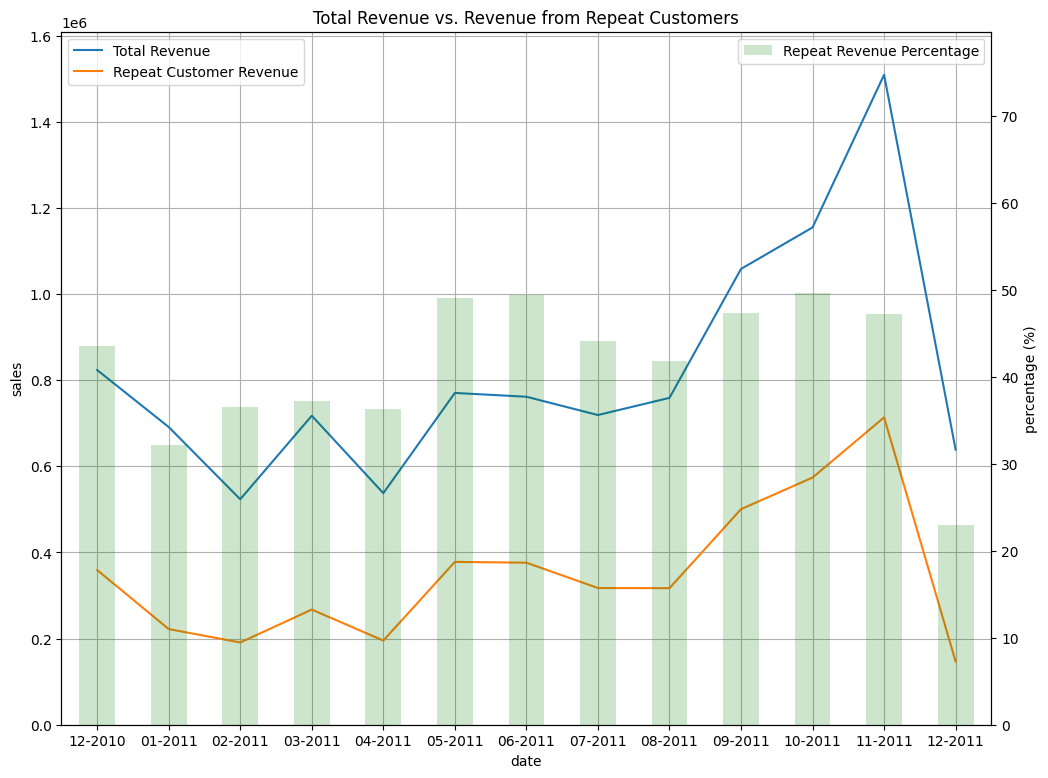

In [34]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_revn_repeat_customer_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()
pd.DataFrame(monthly_revn_perc_repeat_customer_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_revn_perc_repeat_customer_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m-%Y') for x in monthly_revn_perc_repeat_customer_df.index
])


plt.show()

### Interpretation:
Tracking revenue from repeat customers highlights their contribution to overall sales, helping assess retention efforts. This data informs strategies like loyalty programs or personalized offers to enhance customer relationships and drive long-term revenue.

### Popular Items Over Time:
Analyze monthly sales data for different products and create a plot that visualizes the quantity trends over time, highlighting the top 5 items with a custom date format and labeled axes


In [35]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\814040035.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


Quantity
InvoiceDate StockCode             
2010-12-31  10002              251
            10120               16
            10125              154
            10133              130
            10135              411
...                            ...
2011-12-31  DCGSSBOY             1
            DOT                 16
            M                  819
            POST               124
            gift_0001_10         1

[34069 rows x 1 columns]

In [36]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,22197,12460
2,22086,7908
3,85099B,5909
4,22578,5366
...,...,...
2934,90129C,1
2935,22933,1
2936,22934,1
2937,90190B,1


top 5 items

In [37]:
date_item_df = pd.DataFrame(
df.loc[
df['StockCode'].isin([23084, 84836, 22197, 23086, '8500981'])
]. set_index('InvoiceDate').groupby([
pd.Grouper(freq='M'),'StockCode'
])['Quantity'].sum()
)
date_item_df

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_1684\3086855463.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'),'StockCode'


Quantity
InvoiceDate StockCode          
2010-12-31  22197          2738
            84836           530
2011-01-31  22197          1824
            84836           318
2011-02-28  22197          2666
            84836           440
2011-03-31  22197          2803
            84836           292
2011-04-30  22197          1869
            84836           330
2011-05-31  22197          6849
            23084          1131
            23086           112
            84836           412
2011-06-30  22197          2095
            23084          1713
            23086            37
            84836           352
2011-07-31  22197          1876
            23084           294
            23086           129
            84836           446
2011-08-31  22197          5421
            23084          1847
            23086           338
            84836           535
2011-09-30  22197          4196
            23084           215
            23086           294
            84836           527
2011-10-31  22197          5907
            23084          6323
            23086            19
            84836           911
2011-11-30  22197         12460
            23084         14954
            23086           264
            84836           782
2011-12-31  22197          6217
            23084          4311
            23086            35
            84836            69

In [38]:
trending_items_df = date_item_df.reset_index().pivot(
    index='InvoiceDate',
    columns='StockCode',
    values='Quantity'
).fillna(0)

# Resetting and setting the index
trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')

# Check if the columns are a MultiIndex before attempting to drop levels
if isinstance(trending_items_df.columns, pd.MultiIndex):
    trending_items_df.columns = trending_items_df.columns.droplevel(0)

trending_items_df


StockCode,22197,23084,23086,84836
InvoiceDate,,,,
2010-12-31,2738.0,0.0,0.0,530.0
2011-01-31,1824.0,0.0,0.0,318.0
2011-02-28,2666.0,0.0,0.0,440.0
2011-03-31,2803.0,0.0,0.0,292.0
2011-04-30,1869.0,0.0,0.0,330.0
2011-05-31,6849.0,1131.0,112.0,412.0
2011-06-30,2095.0,1713.0,37.0,352.0
2011-07-31,1876.0,294.0,129.0,446.0
2011-08-31,5421.0,1847.0,338.0,535.0


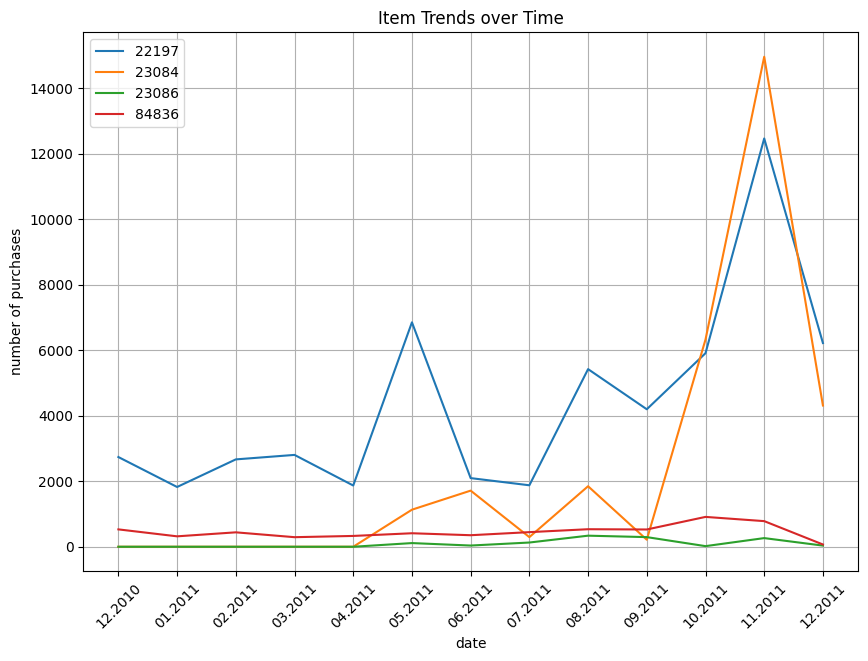

In [39]:
ax = pd.DataFrame(trending_items_df.values).plot(
    figsize=(10, 7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)

plt.show()

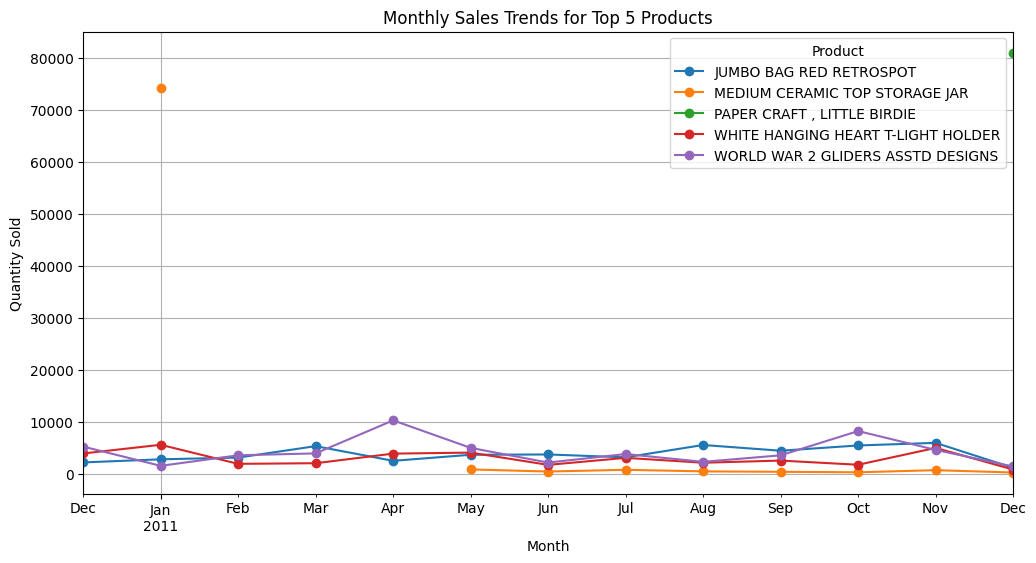

In [40]:
# Aggregate product sales by month
product_sales = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Identify top 5 products overall
top_products = product_sales.groupby('Description')['Quantity'].sum().nlargest(5).index

# Filter for top products
top_product_sales = product_sales[product_sales['Description'].isin(top_products)]

# Pivot for visualization
pivot = top_product_sales.pivot(index='Month', columns='Description', values='Quantity')

# Plot trends for top 5 products
pivot.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales Trends for Top 5 Products")
plt.ylabel("Quantity Sold")
plt.xlabel("Month")
plt.grid()
plt.legend(title="Product")
plt.show()


### Interpretation:
Analyzing monthly sales for the top 5 items reveals consistent performers. Custom date formats and labeled axes improve readability, making it easier to track and compare product trends over time.